In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

##### 타이타닉 전반사

    Data Loading

In [2]:
raw_data = pd.read_csv('../Data/train.csv')
data = raw_data.copy() # copy를 사용해서 raw_data를 변경하지 않도록!
data.head() # data 형태를 확인해봅시다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


    데이터 처리 과정에서 가장 첫번째로 고민해야 할 부분은 '결측값'처리 인 것 같습니다.
    data의 열(columns)에 결측값이 있는지 확인해봅시다.

In [4]:
data.isnull().sum() #data에 null값이 있으면 1로 반환하고 더합니다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age 값과 Cabin , Embared 열에는 결측값이 많이 존재합니다.
- 특히 Cabin의 경우 결측값이 상대적으로 훨씬 많기 때문에 결측값 처리 기준을 잘 세워야 할 것 같습니다.
  그게 아니라면 제거하는 것도 방법일 것 같습니다.
- Embarked 열의 경우에는 2개의 결측값이 있고, 이 값들은 총 891개의 값 중 2개 ffill/bfill 등을 이용해
  결측값을 처리해도 크게 문제되지 않을 것 같습니다.

#### Column 별 해석

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### SEX

<AxesSubplot:xlabel='Sex', ylabel='count'>

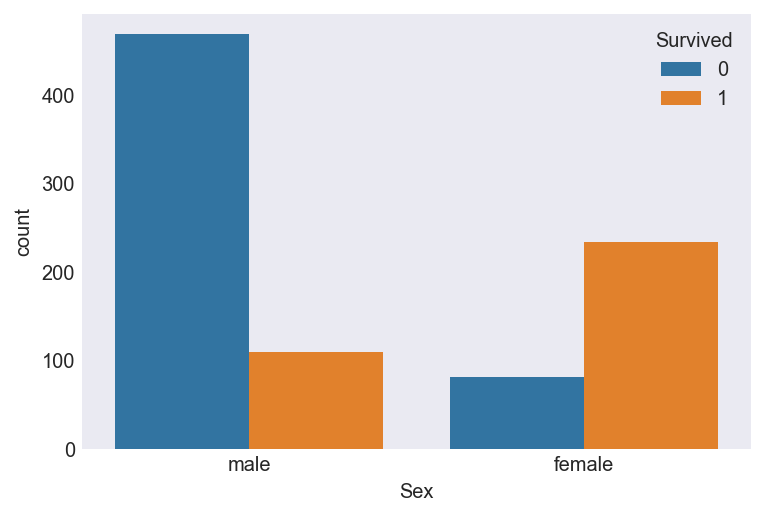

In [6]:
data['Sex'].head() # 우선 성별에 관련된 내용을 확인합니다.
sns.countplot(data=data, x='Sex',hue='Survived')

In [7]:
pd.pivot_table(data, index= 'Sex', values='Survived')
# 피벗테이블로 확인 했을때, 여성이 70%이상이 생존하는 것을 알 수 있음!

,Survived
Sex,
female,0.742038
male,0.188908


###### Age

In [8]:
data['Age'].isnull().sum() # 결측값이 177개.

177

In [9]:
#3번째 평균값이 아닌 중간값으로 처리해봄.
data['Age'] = data['Age'].fillna(data["Age"].median())
data["Age"].isnull().sum()
data.Age.unique()
data['Age'] = data["Age"].round(2)
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
print(data["Age"].unique())
#Age데이터는 값들의 종류가 많아, 종속변수 혹은 다른것들과 함께 봐야할 것 같다.

[22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

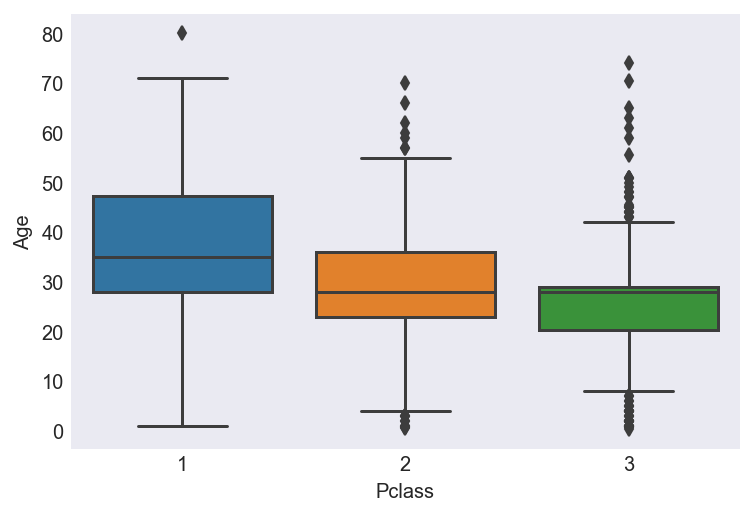

In [11]:
# 그렇다면 나이별로 어떤 클래스를 많이 탔을까
sns.boxplot(data=data, x='Pclass', y='Age')
# 1등급을 탄 사람들이 상대적으로 연령이 높다는 것을 알 수 있다.

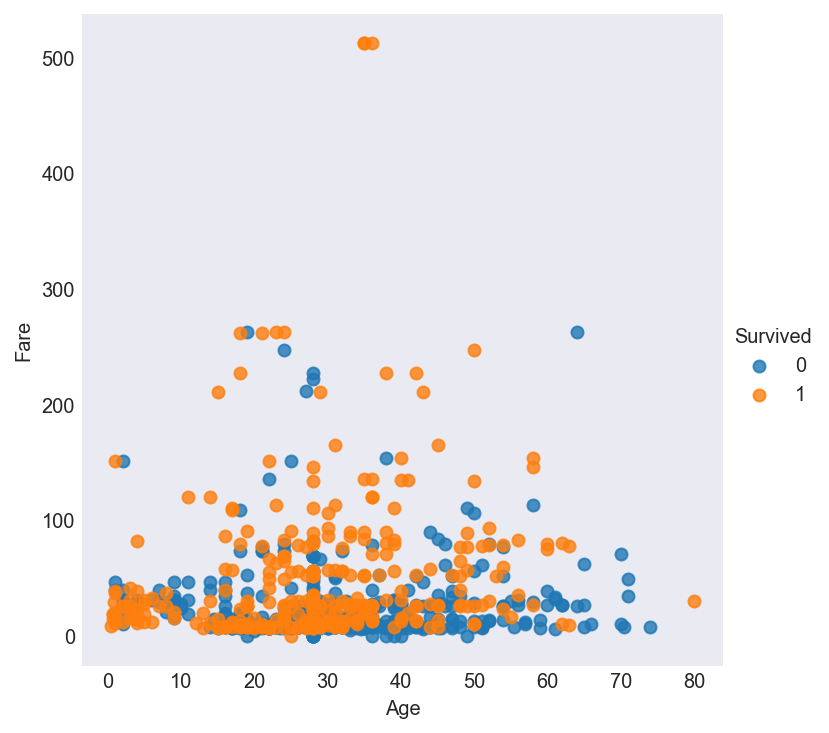

In [12]:
# 그럼 돈을 어떻게 냈을지 확인해보자.
# Age 와 Fare 의 상관관계를 분석합시다.
sns.lmplot(data=data, x='Age',y='Fare',hue='Survived',fit_reg=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

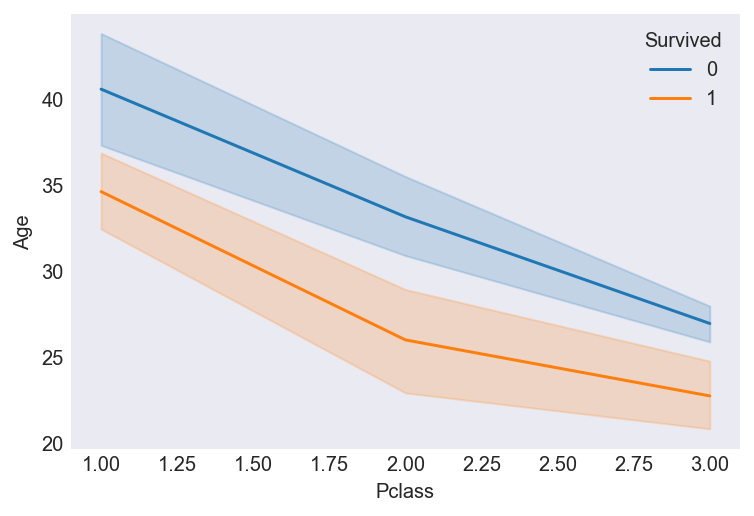

In [111]:
sns.lineplot(data=data,x='Pclass',y='Age',hue='Survived')

In [13]:
data['Fare'].describe()
#전체 평균값은 32정도 되고, 최대값은 512로 매우 차이가 많이 나는 것으로 보인다,.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
lf = data[data['Fare'] < 500]
data.shape , lf.shape #outlier인 3개의 데이터를 삭제해줍니다.

((891, 12), (888, 12))

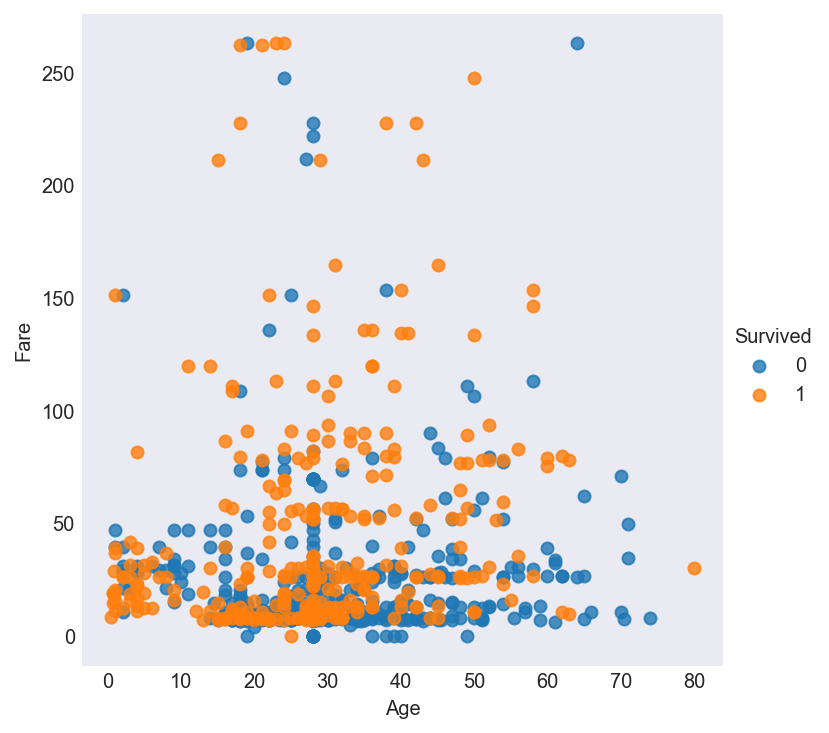

In [15]:
sns.lmplot(data=lf, x='Age',y='Fare',hue='Survived',fit_reg=False)

###### SibSp, Parch

In [16]:
#따라서 SibSp와 Parch를 한 컬럼으로 정리합니다.
#하지만 SibSp와 Parch가 없이, 단 홀로 탔다고 가정할때,
#혼자 탔다고 하면 Family == 1 로 나타나야하니, 1을 더해줍니다.
data['Family'] = data['SibSp'] + data['Parch'] + 1
print(data['Family'].head(1))
data[["SibSp","Parch","Family"]].head()

0    2
Name: Family, dtype: int64


,SibSp,Parch,Family
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


그렇다면 가족수와 생존관계를 파악해봅니다.

<AxesSubplot:xlabel='Family', ylabel='count'>

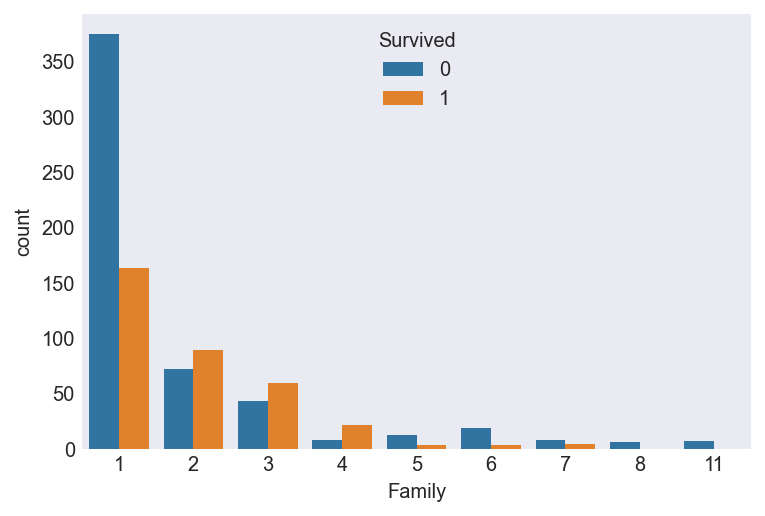

In [17]:
sns.countplot(data=data,x='Family',hue='Survived')

In [18]:
data[['Family','Survived']].groupby(['Family']).mean()

,Survived
Family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [19]:
def cat_family(x):
    cat=''
    if x == 1:
        cat = 'Single'
    elif 2 <= x <= 4:
        cat = 'Nuclear'
    else:
        cat = 'Big'
    return cat

data['Family_cat'] = data['Family'].apply(lambda x : cat_family(x))
data[['Family','Family_cat']].head()

,Family,Family_cat
0,2,Nuclear
1,2,Nuclear
2,1,Single
3,2,Nuclear
4,1,Single


<AxesSubplot:xlabel='Family_cat', ylabel='count'>

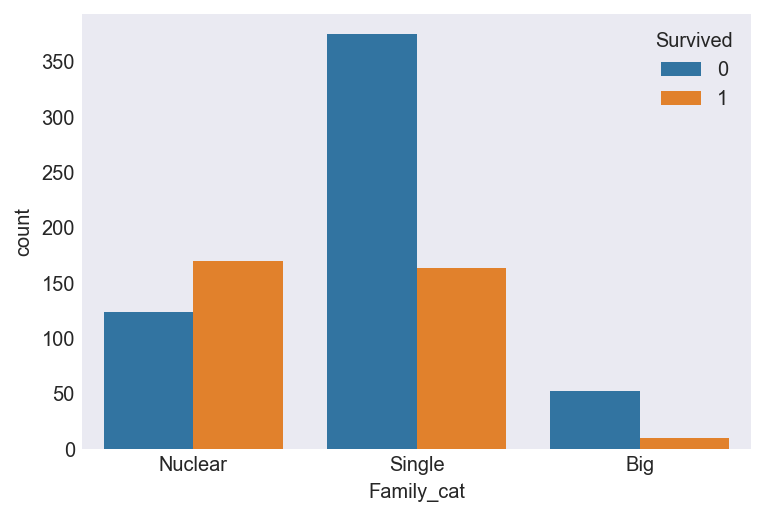

In [20]:
sns.countplot(data=data,x='Family_cat',hue='Survived')
#Single 과 Big 의 관계를 보면, 생존확률이 상대적으로 매우 낮다.
#반면 핵가족인 Nuclear를 보면, 생존확률이 높습니다.

In [21]:
pd.pivot_table(data=data, index='Family_cat', values='Survived')

,Survived
Family_cat,
Big,0.161290
Nuclear,0.578767
Single,0.303538


###### Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

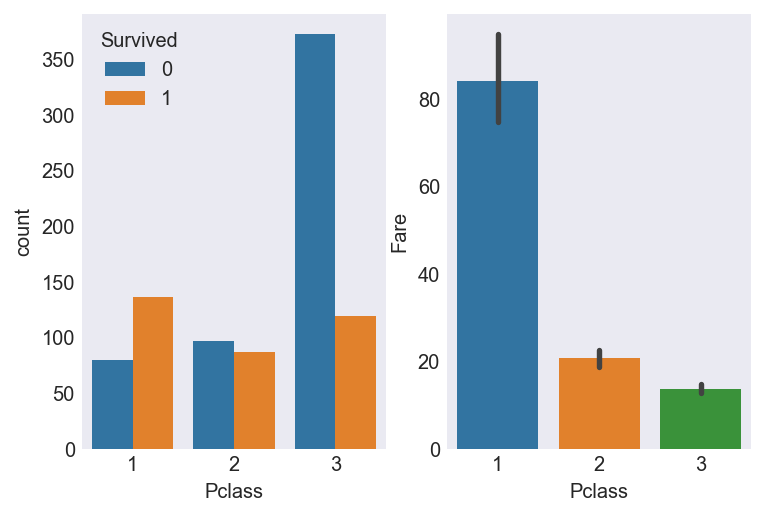

In [22]:
fig, ax = plt.subplots(ncols=2)
sns.countplot(data=data, x='Pclass',hue='Survived',ax=ax[0])
sns.barplot(data=data, x='Pclass',y='Fare',ax=ax[1])
#Pclass가 등급이 높을수록 Fare는 높지만, 생존확률이 상대적으로 높은것을 확인됩니다.

###### Embarked

In [23]:
data['Embarked'].isnull().sum() # 결측값이 2개 있음.
# 891 개 중 2개이고, 가장 많이 탑승한 지역 S << 로 임의로 채워줌.
data['Embarked'] = data['Embarked'].fillna('S')
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Family           0
Family_cat       0
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

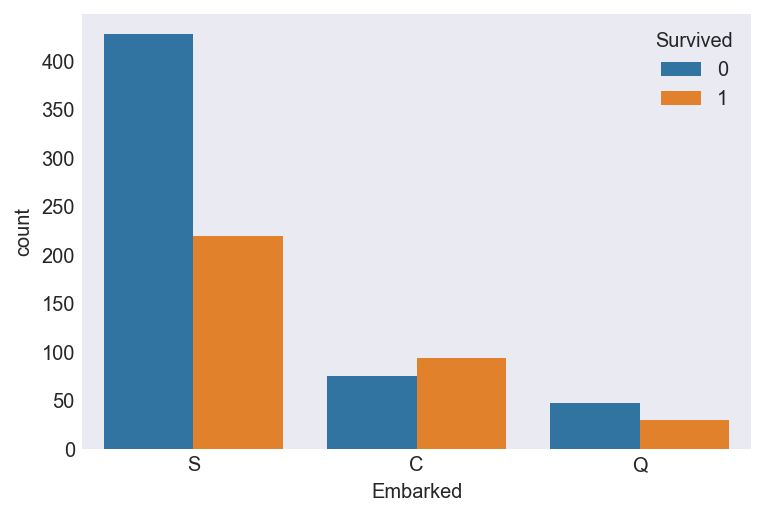

In [24]:
sns.countplot(data=data,x='Embarked',hue='Survived')

In [25]:
pd.pivot_table(data, index='Embarked',values='Survived')

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


###### Name
Name 성,호칭(?).이름 으로 구성되어있습니다.

In [26]:
data['Name'].unique()

In [27]:
data['Name'].isnull().sum()

0

In [28]:
def get_title(x):
    return x.split(', ')[1].split('. ')[0]
a = data['Name'].apply(lambda x : get_title(x))
a.unique()
a.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Don               1
Ms                1
Mme               1
Lady              1
Capt              1
Sir               1
the Countess      1
Jonkheer          1
Name: Name, dtype: int64

In [29]:
# data. loc [ 행-탐색조건 / 열-새로운열] = (새로운열 + 탐색조건 행 의) 값.
data.loc[data['Name'].str.contains('Mr'),'Name_cat'] = "Mr"
data.loc[data['Name'].str.contains('Master'),'Name_cat'] = "Master"
data.loc[data['Name'].str.contains('Miss'),'Name_cat'] = "Miss"
data.loc[data['Name'].str.contains('Mrs'),'Name_cat'] = "Mrs"

In [30]:
data['Name_cat'].unique()
data['Name_cat'].isnull().sum()
ix = [index for index, row in data[['Name_cat']].iterrows() if row.isnull().any()]

In [31]:
data.iloc[ix].head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_cat,Name_cat
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1,Single,NaN


In [32]:
data['Name_cat'].unique()
data['Name_cat'] = data['Name_cat'].fillna('Other')

,Survived
Name_cat,
Master,0.575000
Miss,0.700000
Mr,0.158301
Mrs,0.790698
Other,0.375000


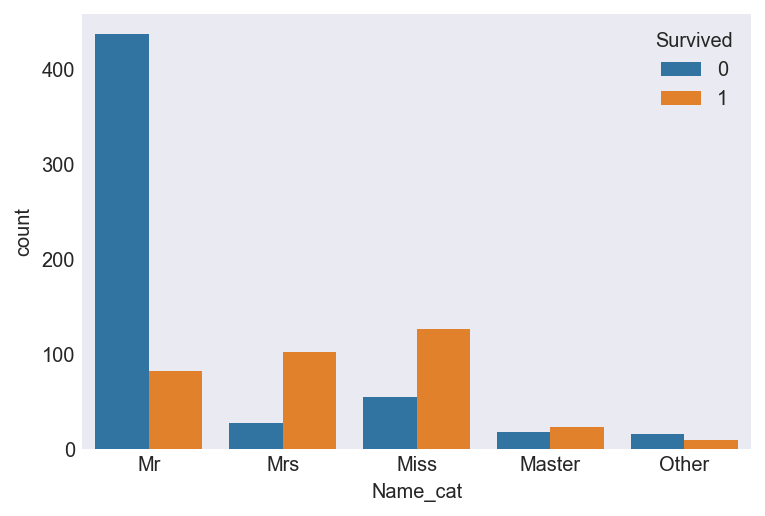

In [33]:
sns.countplot(data=data, x='Name_cat',hue='Survived')
pd.pivot_table(data, index='Name_cat',values='Survived')

In [34]:
# 검증
c_a = data[(data['Name_cat']=='Master') & (data['Age'])]
c_a['Age'].describe()

count    40.000000
mean      6.916750
std       7.900328
min       0.420000
25%       1.750000
50%       4.000000
75%       9.000000
max      28.000000
Name: Age, dtype: float64

###### Cabin
    일단 넘어가보자 (07/22)

# Preprocessing

In [35]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat',
       'Name_cat'],
      dtype='object')

###### SEX encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['Sex']
for feature in features:
    data['Sex_E'] = le.fit_transform(data['Sex'])
data[['Sex','Sex_E']].head()

,Sex,Sex_E
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


###### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

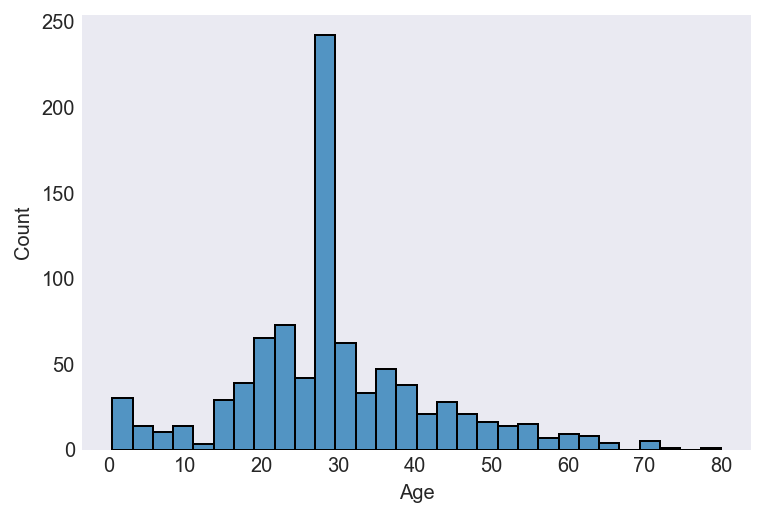

In [37]:
data['Age'].unique()
data['Age'].isnull().sum()
sns.histplot(data['Age'])

In [38]:
def age_cat(x):
    cat= ''
    if x < 5 :
        cat = 'Baby'
    elif 5 <= x < 20 :
        cat = 'Children'
    elif 20 <= x < 40 :
        cat = 'Young_adult'
    elif 40 <= x < 65:
        cat = 'Adult'
    else:
        cat = 'Elderly'
    return cat

data['Age_cat'] = data['Age'].apply(lambda x : age_cat(x))
data[['Age_cat','Age']]

,Age_cat,Age
0,Young_adult,22.0
1,Young_adult,38.0
2,Young_adult,26.0
3,Young_adult,35.0
4,Young_adult,35.0
...,...,...
886,Young_adult,27.0
887,Children,19.0
888,Young_adult,28.0
889,Young_adult,26.0


In [39]:
data['Age_cat'].unique()

array(['Young_adult', 'Adult', 'Baby', 'Children', 'Elderly'],
      dtype=object)

In [40]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_cat,Name_cat,Sex_E,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,2,Nuclear,Mr,1,Young_adult


##### 여기까지 우선  전처리 완료. 
문자열을 모두 숫자열으로 변환!

In [41]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_cat,Name_cat,Sex_E,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Nuclear,Mr,1,Young_adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Nuclear,Mrs,0,Young_adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Single,Miss,0,Young_adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Nuclear,Mrs,0,Young_adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Single,Mr,1,Young_adult


    필요하지 않은 컬럼 제거.
    PassengerId,Name, Age, sex, SibSp, Parch,  Ticket, Cabin, Family

In [42]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat',
       'Name_cat', 'Sex_E', 'Age_cat'],
      dtype='object')

    Embarked/Name_ct/Age_cat 을 숫자로 바꿔보자.

In [43]:
data['Embarked_clean'] = data['Embarked'].replace({'S':0,'C':1,'Q':2})
data['Name_cat'] = data['Name_cat'].replace({'Mr':0,'Master':1,'Mrs':2,'Miss':3,'Other':4})
data['Age_cat'] = data['Age_cat'].replace({'Baby':0,'Children':1,'Young_adult':2,'Adult':3,'Elderly':4})
# data.drop('Embarked',axis=1,inplace=True)

In [44]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat',
       'Name_cat', 'Sex_E', 'Age_cat', 'Embarked_clean'],
      dtype='object')

In [45]:
train_cols_1 = ['Survived', 'Pclass', 'Age', 'Fare', 'Family', 'Name_cat', 'Sex_E',
       'Age_cat', 'Embarked_clean']
train_data_1 = data[train_cols_1]

In [46]:
train_data_1.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Family', 'Name_cat', 'Sex_E',
       'Age_cat', 'Embarked_clean'],
      dtype='object')

    이걸 한번 돌려보자

In [47]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
y = train_data_1['Survived']
X = train_data_1.drop('Survived',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 

In [48]:
# Random Forest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

rf 예측 정확도 : 0.8435754189944135


<img src = 'train_data_1.png' STYLE = 'width:1500px;'>

######    age(평균) - 약 86% 정도 나온다. 
    age(중간) - 약 85%로 크게 차이가 없다. 

#### 조금더 개선을 해볼까
    Numeric이 아닌 onehot encoding

In [49]:
train_data_2 = data.copy()
train_data_2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat',
       'Name_cat', 'Sex_E', 'Age_cat', 'Embarked_clean'],
      dtype='object')

In [50]:
print(train_data_2['Age_cat'].unique())
age = train_data_2['Age_cat']
train_data_2[['Age_Y_OE','Age_A_OE','Age_B_OE','Age_C_OE','Age_E_OE']] = pd.get_dummies(age)
train_data_2.columns

[2 3 0 1 4]


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat',
       'Name_cat', 'Sex_E', 'Age_cat', 'Embarked_clean', 'Age_Y_OE',
       'Age_A_OE', 'Age_B_OE', 'Age_C_OE', 'Age_E_OE'],
      dtype='object')

In [51]:
print(train_data_2['Name_cat'].unique())
name = train_data_2['Name_cat']
train_data_2[['Name_Mr_OE','Name_Mrs_OE','Name_Miss_OE','Name_Ma_OE','Name_Ot_OE']] = pd.get_dummies(name)
train_data_2.columns

[0 2 3 1 4]


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat',
       'Name_cat', 'Sex_E', 'Age_cat', 'Embarked_clean', 'Age_Y_OE',
       'Age_A_OE', 'Age_B_OE', 'Age_C_OE', 'Age_E_OE', 'Name_Mr_OE',
       'Name_Mrs_OE', 'Name_Miss_OE', 'Name_Ma_OE', 'Name_Ot_OE'],
      dtype='object')

In [52]:
print(train_data_2['Family_cat'].unique())
embarked = train_data_2['Family_cat']
train_data_2[['Fm_S_OE','Fm_N_OE','Fm_B_OE']] = pd.get_dummies(embarked)
train_data_2.columns

['Nuclear' 'Single' 'Big']


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat',
       'Name_cat', 'Sex_E', 'Age_cat', 'Embarked_clean', 'Age_Y_OE',
       'Age_A_OE', 'Age_B_OE', 'Age_C_OE', 'Age_E_OE', 'Name_Mr_OE',
       'Name_Mrs_OE', 'Name_Miss_OE', 'Name_Ma_OE', 'Name_Ot_OE', 'Fm_S_OE',
       'Fm_N_OE', 'Fm_B_OE'],
      dtype='object')

In [53]:
print(train_data_2['Embarked'].unique())
embarked = train_data_2['Embarked']
train_data_2[['Eb_S_OE','Eb_C_OE','Eb_Q_OE']] = pd.get_dummies(embarked)
train_data_2.columns

['S' 'C' 'Q']


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat',
       'Name_cat', 'Sex_E', 'Age_cat', 'Embarked_clean', 'Age_Y_OE',
       'Age_A_OE', 'Age_B_OE', 'Age_C_OE', 'Age_E_OE', 'Name_Mr_OE',
       'Name_Mrs_OE', 'Name_Miss_OE', 'Name_Ma_OE', 'Name_Ot_OE', 'Fm_S_OE',
       'Fm_N_OE', 'Fm_B_OE', 'Eb_S_OE', 'Eb_C_OE', 'Eb_Q_OE'],
      dtype='object')

In [54]:
train_cols_1

['Survived',
 'Pclass',
 'Age',
 'Fare',
 'Family',
 'Name_cat',
 'Sex_E',
 'Age_cat',
 'Embarked_clean']

In [55]:
train_cols_2 = ['Survived', 'Pclass','Fare','Sex_E', 'Age_Y_OE', 'Age_A_OE', 'Age_B_OE',
       'Age_C_OE', 'Age_E_OE', 'Name_Mr_OE', 'Name_Mrs_OE', 'Name_Miss_OE',
       'Name_Ma_OE', 'Name_Ot_OE', 'Fm_S_OE', 'Fm_N_OE', 'Fm_B_OE', 'Eb_S_OE',
       'Eb_C_OE', 'Eb_Q_OE']
train_data_2 = train_data_2[train_cols_2]

In [56]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
y = train_data_2['Survived']
X = train_data_2.drop('Survived',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 

In [57]:
# Random Forest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

rf 예측 정확도 : 0.7988826815642458


<img src = 'train_data_2.png' STYLE = 'width:1500px;'>

    너무 많은 원 핫 인코딩은 예측률을 더 저하시킨다.

#### 조금 더 개선시켜보자.

     cabin

In [58]:
data.columns
print(data['Cabin'].isnull().sum())
data['Cabin'].unique()

687


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [59]:
data['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
F33            3
              ..
C49            1
B42            1
B82 B84        1
E68            1
A7             1
Name: Cabin, Length: 147, dtype: int64

    전과 마찬가지로 cabin 의 모든 부분을 특정 클라스로 지정할 수는 없다.
    따라서 티켓뒤 숫자가 아닌 앞 알파벳만 추출해보자

In [60]:
data['Cabin'] = data['Cabin'].str[:1]
print(data['Cabin'].unique())
data['Cabin'].isnull().sum()

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


687

In [61]:
data['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

- 최상층에 위치한 The Boat Deck. 구명정이 설치되어 있던 층이며, 합교,조타실, 선장실이 있던 층입니다.
- 1등실의 산책로, 객실, 라운지, 등등 1등실 승객만을 위한 층인 'A deck',
- 1등실의 개인 산책로와 초호화객실 'B deck',
- 1등실의 대다수 객실과 2등실의 도서관, 3등실의 산책로와 선원의 숙소, 3등실 승객의 라운지로 여러가지가 존재한 'C deck',
- 1등실 연회실, 식당, 2등실 식당으로 구성된 'D deck'
- 2등실의 승객과 선원들의 객실이 포함된 'E deck'
- 2,3등실 객실과 선원 생활공간, 3등실 식당이 포함된 'F deck'
- 선원 및 승객들이 사용하는 다양한 생활공간인 'G deck'
- 최하층 갑판인 'Orlop Deck'
- 그 아래 보일러, 엔진 시설이 있는 'Tank Top'

        도메인의 근거로, A/B/C 는 1등급,D/E 는 2등급, F는 3등급 으로 우선 채워주자.

In [62]:
#우선 nan값을 가지고 있는 데이터 프레임 하나를 만들자.
ix = [index for index, row in data[['Cabin']].iterrows() if row.isnull().any()]
nan_data = data.iloc[ix]
nan_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_cat,Name_cat,Sex_E,Age_cat,Embarked_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Nuclear,0,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Single,3,0,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Single,0,1,2,0
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,1,Single,0,1,2,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,Big,1,1,0,0


In [63]:
#이제 여기에 넣어주자. 
#pclass가 1 일 경우에는 B 랜덤적용.
#pclass가 2일 경우에는 E 랜덤
#pclass가 3일 경우에는 F로 채워주자.
def fill_cabin(x):
    cat=''
    if x == 1:
        cat = 'B'
    elif x == 2:
        cat = 'E'
    elif x == 3:
        cat = 'F'
    return cat
nan_data['Cabin'] = nan_data['Pclass'].apply(lambda x : fill_cabin(x))
data['Cabin'] = data['Cabin'].fillna(nan_data['Cabin'])
print(data.isnull().sum())
data.head()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Family            0
Family_cat        0
Name_cat          0
Sex_E             0
Age_cat           0
Embarked_clean    0
dtype: int64


<ipython-input-63-1302d406f916>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_data['Cabin'] = nan_data['Pclass'].apply(lambda x : fill_cabin(x))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_cat,Name_cat,Sex_E,Age_cat,Embarked_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F,S,2,Nuclear,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,Nuclear,2,0,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,F,S,1,Single,3,0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Nuclear,2,0,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,F,S,1,Single,0,1,2,0


In [64]:
data['Cabin'].value_counts()

F    492
E    200
B     87
C     59
D     33
A     15
G      4
T      1
Name: Cabin, dtype: int64

In [65]:
# Cabin 열 Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = ['Cabin']
for feature in features:
    data['Cabin_Label'] = le.fit_transform(data[feature])
data[['Cabin','Cabin_Label']]

,Cabin,Cabin_Label
0,F,5
1,C,2
2,F,5
3,C,2
4,F,5
...,...,...
886,E,4
887,B,1
888,F,5
889,C,2


In [66]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat',
       'Name_cat', 'Sex_E', 'Age_cat', 'Embarked_clean', 'Cabin_Label'],
      dtype='object')

In [67]:
train_cols_3 = ['Survived', 'Pclass',  'Age',
       'Fare', 'Embarked_clean', 'Family',
       'Name_cat', 'Sex_E', 'Age_cat', 'Cabin_Label']


In [68]:
data['Family']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Family, Length: 891, dtype: int64

In [69]:
train_data_3 = data[train_cols_3]

In [70]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
y = train_data_3['Survived']
X = train_data_3.drop('Survived',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 

In [71]:
# Random Forest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

rf 예측 정확도 : 0.8435754189944135


<img src = 'train_data_3.png' STYLE = 'width:1500px;'>

#### 쪼금더..!

In [72]:
count, fare_divs = np.histogram(data['Fare'].dropna(),bins=4)
print(count,fare_divs)
bins_name= [0,1,2,3]
data['Fare_clean'] = pd.cut(x=data['Fare'],
                           bins = fare_divs,
                           labels =bins_name,
                           include_lowest=True)
data[['Fare','Fare_clean']]
data['Fare_clean'].value_counts()

[853  29   6   3] [  0.     128.0823 256.1646 384.2469 512.3292]


0    853
1     29
2      6
3      3
Name: Fare_clean, dtype: int64

In [73]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat',
       'Name_cat', 'Sex_E', 'Age_cat', 'Embarked_clean', 'Cabin_Label',
       'Fare_clean'],
      dtype='object')

In [74]:
train_data_4 = train_data_3.copy()
train_data_4['Fare_clean'] = data['Fare_clean']
train_data_4.drop('Fare',axis=1,inplace=True)

In [75]:
train_data_4.head()

,Survived,Pclass,Age,Embarked_clean,Family,Name_cat,Sex_E,Age_cat,Cabin_Label,Fare_clean
0,0,3,22.0,0,2,0,1,2,5,0
1,1,1,38.0,1,2,2,0,2,2,0
2,1,3,26.0,0,1,3,0,2,5,0
3,1,1,35.0,0,2,2,0,2,2,0
4,0,3,35.0,0,1,0,1,2,5,0


In [76]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
y = train_data_4['Survived']
X = train_data_4.drop('Survived',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 

In [77]:
# Random Forest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

rf 예측 정확도 : 0.8491620111731844


<img src = 'train_data_4.png' STYLE = 'width:1500px;'>

#### 마지막 한번만 더

In [78]:
count, age_divs = np.histogram(data['Age'].dropna(),bins=8)
print(count,age_divs)
bins_name= [0,1,2,3,4,5,6,7]
data['Age_histo'] = pd.cut(x=data['Age'],
                           bins = age_divs,
                           labels =bins_name,
                           include_lowest=True)
data[['Age','Age_histo']]
data['Age_histo'].value_counts()

[ 64 115 407 155  86  42  17   5] [ 0.42   10.3675 20.315  30.2625 40.21   50.1575 60.105  70.0525 80.    ]


2    407
3    155
1    115
4     86
0     64
5     42
6     17
7      5
Name: Age_histo, dtype: int64

In [79]:
train_data_5 = train_data_4.copy()
train_data_5['Age_histo'] = data['Age_histo']

In [80]:
train_data_5.columns

Index(['Survived', 'Pclass', 'Age', 'Embarked_clean', 'Family', 'Name_cat',
       'Sex_E', 'Age_cat', 'Cabin_Label', 'Fare_clean', 'Age_histo'],
      dtype='object')

In [81]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
y = train_data_5['Survived']
X = train_data_5.drop('Survived',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 

In [82]:
# Random Forest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

rf 예측 정확도 : 0.8659217877094972


In [83]:
# 최대 에측 0.8715

<img src = 'train_data_5.png' STYLE = 'width:1500px;'>

#### 진짜 마지막 도전

In [84]:
train_data_5.columns

Index(['Survived', 'Pclass', 'Age', 'Embarked_clean', 'Family', 'Name_cat',
       'Sex_E', 'Age_cat', 'Cabin_Label', 'Fare_clean', 'Age_histo'],
      dtype='object')

In [85]:
train_data_6 = pd.get_dummies(train_data_5,columns=[ 'Pclass', 'Age', 'Embarked_clean', 'Family', 'Name_cat',
       'Sex_E', 'Age_cat', 'Cabin_Label', 'Fare_clean', 'Age_histo'])

In [86]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
y = train_data_6['Survived']
X = train_data_6.drop('Survived',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 

In [87]:
# Random Forest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

rf 예측 정확도 : 0.8324022346368715


<img src = 'train_data_6.png' STYLE = 'width:1500px;'>

In [ ]:
sns.lmplot()